In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

In [184]:
def read_data(data):
    """Read the data from the file."""
    return np.loadtxt(data)

In [185]:
name = "L12_J1.00_q8"
# folder = f"results/{name}/"
folder = f"results/good_results/{name}/"

file = f"{folder}{name}.txt"

q=int(name[-1])
print(q)

8


In [186]:
lng = read_data(file)

In [187]:
lng = lng[lng[:, 1] > 1]

def normalize_lng(lng):
    lng[:, 1] = np.log(8) + lng[:, 1] - lng[0, 1]
    return lng

lng = normalize_lng(lng)

In [188]:
# save this data as a file txt with two columns
savename = f"{folder}{name}_no0.txt"
np.savetxt(savename, lng, fmt='%.6f %.6f')

In [189]:
beta_c = np.log(1 + np.sqrt(q))
print(beta_c)

1.342454046453526


Text(0, 0.5, 'log[$\\Omega$(E)]')

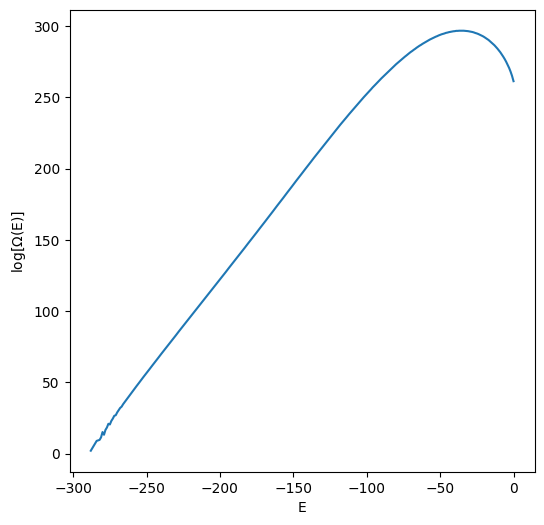

In [190]:
plt.figure(figsize=(6, 6))
plt.plot(lng[:, 0], lng[:, 1])
plt.xlabel('E')
plt.ylabel(r'log[$\Omega$(E)]')


In [ ]:
from ipywidgets import interact, FloatSlider

log_omega = lng[:, 1]
E = lng[:, 0]

def update_plot(beta):
   
    W = log_omega - beta * E
    W_max = np.max(W)

    log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))

    A_ = log_Z - W
    
    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(-E, A_, label=f'beta={beta}')
    plt.xlabel('E')
    plt.ylabel('A(E)')
    plt.title('A(E)')

    plt.legend()
    plt.grid()
    plt.show()

# Interactive slider
interact(update_plot, beta=FloatSlider(value=beta_c, min=0, max=4, step=0.0001))


interactive(children=(FloatSlider(value=1.342454046453526, description='beta', max=4.0, step=0.0001), Output()…

<function __main__.update_plot(beta)>

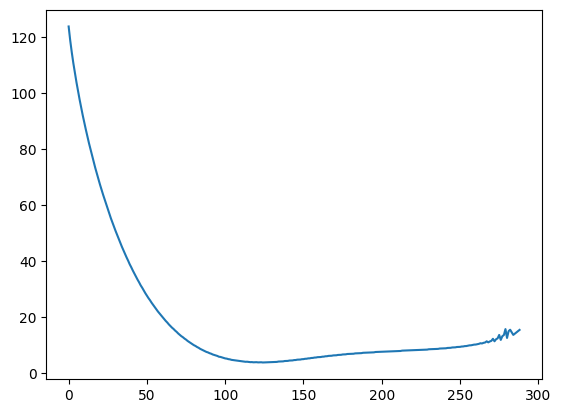

In [192]:
# Obtain A
log_omega = lng[:, 1]
E = lng[:, 0]
beta = 1.277089	
W = log_omega - beta * E
W_max = np.max(W)

log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))

A_ = log_Z - W

plt.plot(-E, A_, label='A(E)')
plt.show()


In [193]:
def A(E, beta):
    W = log_omega - beta * E
    W_max = np.max(W)
    log_Z = W_max + np.log(np.sum(np.exp(W - W_max)))
    return log_Z - W

In [194]:
def search_minima(beta, min, max):
    """
    Search for the minima of A(E) for a given beta.
    
    Parameters:
    -----------
    beta: np.array
        Values of beta to search the minima.
    """
    E_A = [] # must be a list of arrays with the values of E and A for each minima for each beta
    diff = []
    E_max = []
    A_max = []
    for b in beta:
        A_int = A(E, b)
        A_int = interp1d(-E, A_int, kind='cubic')

        E_interp = np.linspace(min, max, 1000)

        # sort the values of A and E according to A sorted
        A_sorted = np.sort(A_int(E_interp))
        E_sorted = E_interp[np.argsort(A_int(E_interp))]

        E_sor = []
        A_sor = []
        E_sor.append(E_sorted[0])
        A_sor.append(A_sorted[0])

        

        for i in range(1, E_sorted.size):
            if np.abs(E_sorted[i] - E_sorted[0]) > 40:
                E_sor.append(E_sorted[i])
                A_sor.append(A_sorted[i])
                break
        E_A.append(np.column_stack((E_sor, A_sor)))
        diff.append(np.abs(A_sor[0]-A_sor[1]))
        
        # E between E_sor[0] and E_sor[1]
        A_aux = 0
        if E_sor[0] > E_sor[1]:
            A_aux = np.max(A_int(E_interp)[(E_interp >= E_sor[1]) & (E_interp <= E_sor[0])])
            
        else:
            A_aux = np.max(A_int(E_interp)[(E_interp >= E_sor[0]) & (E_interp <= E_sor[1])])
        E_max.append(E_interp[np.where(A_int(E_interp) == A_aux)])
        A_max.append(A_aux)

    # print the value of E that corresponds to A_aux
        
    E_A = np.array(E_A)
    diff = np.array(diff)
    E_max = np.array(E_max)
    A_max = np.array(A_max)
    
    # sort diff from lowest to highest
    EA = E_A[np.argsort(diff)]
    E_max = E_max[np.argsort(diff)]
    A_max = A_max[np.argsort(diff)]

    # dataframe with columns beta_sorted, E_A, diff
    df = pd.DataFrame({'beta_sorted': beta[np.argsort(diff)], 'E_min_0': EA[:, 0, 0], 'E_min_1': EA[:, 1, 0], 'A_0': EA[:, 0, 1], 'A_1': EA[:, 1, 1], 'diff': np.sort(diff), 'E_max': E_max[:, 0], 'A_max': A_max})
    
    return df


L = 6: 15, 70 \
L = 8: 35, 125 

In [206]:
ranges = {"L6": [15, 70], "L8": [35, 128], "L10": [65, 185], "L12": [95, 280]}

In [207]:
beta = np.linspace(beta_c-0.1, beta_c+0.1, 1000)
beta_df = search_minima(beta, ranges["L12"][0], ranges["L12"][1])

In [208]:
beta_df

,beta_sorted,E_min_0,E_min_1,A_0,A_1,diff,E_max,A_max
0,1.322134,132.777778,240.740741,4.719320,4.729133,0.009814,178.148148,5.531382
1,1.322334,240.740741,132.777778,4.719071,4.730872,0.011801,178.148148,5.533851
2,1.321934,132.777778,240.740741,4.707861,4.739289,0.031428,178.148148,5.529007
3,1.322534,240.740741,132.777778,4.709101,4.742516,0.033415,178.148148,5.536412
4,1.321733,132.777778,240.740741,4.696495,4.749537,0.053042,178.148148,5.526723
...,...,...,...,...,...,...,...,...
995,1.441653,276.111111,235.925926,2.666524,6.059259,3.392735,235.925926,6.059259
996,1.441853,276.111111,235.925926,2.664508,6.065288,3.400780,235.925926,6.065288
997,1.442054,276.111111,235.925926,2.662497,6.071323,3.408825,235.925926,6.071323
998,1.442254,276.111111,235.925926,2.660493,6.077363,3.416870,235.925926,6.077363


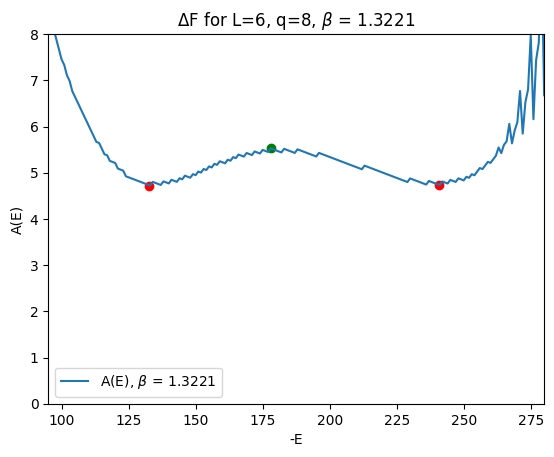

In [209]:
plt.plot(-E, A(E, beta_df["beta_sorted"][0]), label=r'A(E), $\beta$ = {:.4f}'.format(beta_df["beta_sorted"][0]))
plt.scatter(beta_df["E_min_0"][0], beta_df["A_0"][0], color='red')
plt.scatter(beta_df["E_min_1"][0], beta_df["A_1"][0], color='red')
plt.scatter(beta_df["E_max"][0], beta_df["A_max"][0], color='green')
# add text with the value of the difference 
deltaF = beta_df["A_max"][0] - ((beta_df["A_0"][0] + beta_df["A_1"][0])/2)
# plt.text(330, 5.3, r"$\Delta F = {:.4f}$".format(deltaF), fontsize=10)

# plt.arrow(beta_df["E_max"][0], beta_df["A_0"][0]+0.15, 0, beta_df["A_max"][0]-beta_df["A_0"][0]-0.3, head_width=5, head_length=0.1, fc='black', ec='black')
# plt.arrow(beta_df["E_max"][0], beta_df["A_max"][0]-0.15, 0, -beta_df["A_max"][0]+beta_df["A_0"][0]+0.3, head_width=5, head_length=0.1, fc='black', ec='black')

# plt.axhline(y=beta_df["A_max"][0], color='green', xmin=0.3, xmax=0.6, linestyle='--')
# plt.axhline(y=(beta_df["A_0"][0] + beta_df["A_1"][0])/2,  xmin=0.1, xmax=0.9, color='red', linestyle='--')

plt.xlabel('-E')
plt.ylabel('A(E)')
plt.xlim(ranges["L12"][0], ranges["L12"][1])
plt.ylim(0, 8)
plt.title(r'$\Delta$F for L=6, q=8, $\beta$ = {:.4f}'.format(beta_df["beta_sorted"][0]))
plt.legend()
plt.show()


In [210]:
deltaF = beta_df["A_max"][0] - ((beta_df["A_0"][0] + beta_df["A_1"][0])/2)
print(deltaF)

0.8071557393793052


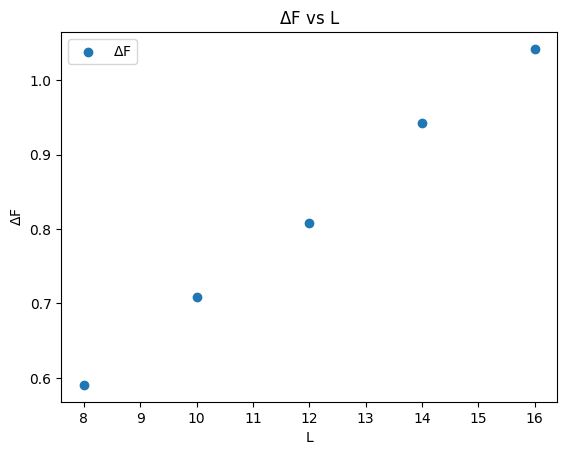

In [212]:
L_deltaF = np.loadtxt("L_deltaF.txt")

plt.scatter(L_deltaF[:, 0], L_deltaF[:, 1], label=r'$\Delta$F')
plt.xlabel('L')
plt.ylabel(r'$\Delta$F')
plt.title(r'$\Delta$F vs L')
plt.legend()
plt.show()